# **Import Libraries**


In [1]:
! pip install plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
!python -m pip install --upgrade nbformat ipykernel


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# **Reading Data**


In [4]:
df = pd.read_csv(r'C:\Users\gasse\OneDrive\Desktop\Project 1\melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


# **Data Understanding**


### Here’s what each column represents:

1. **Suburb** – The suburb (neighborhood) where the property is located.
2. **Address** – The specific street address of the property.
3. **Rooms** – The number of rooms in the property (bedrooms/living rooms).
4. **Type** – The type of dwelling:

   - `h` = house, cottage, villa, semi, terrace
   - `u` = unit, duplex
   - `t` = townhouse

5. **Price** – The sale price of the property in Australian dollars (target column in prediction tasks).
6. **Method** – The method of sale:

   - `S` = property sold
   - `SP` = property sold prior to auction
   - `PI` = property passed in
   - `VB` = vendor bid
   - `SA` = sold after auction

7. **SellerG** – Real estate agency/company that sold the property.
8. **Date** – The date the property was sold.
9. **Distance** – Distance (in kilometers) from Melbourne’s Central Business District (CBD).
10. **Postcode** – Postal code of the property’s location.
11. **Bedroom2** – Number of bedrooms (sometimes slightly different from `Rooms`).
12. **Bathroom** – Number of bathrooms.
13. **Car** – Number of car spots/garage spaces.
14. **Landsize** – Size of the land (in square meters).
15. **BuildingArea** – Size of the building (in square meters).
16. **YearBuilt** – The year the property was originally constructed.
17. **CouncilArea** – The governing council for the property’s suburb.
18. **Lattitude** – Geographical latitude coordinate.
19. **Longtitude** – Geographical longitude coordinate.
20. **Regionname** – General region where the property is located (e.g., “Northern Metropolitan”, “Western Metropolitan”).
21. **Propertycount** – Number of properties in the suburb (gives density of housing in the area).


# **Exploratory Data Analysis (EDA)**


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
df.describe(include="object")

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


In [8]:
df.describe(include="number")

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


- **Missing Values**


In [9]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [10]:
# Missing values in percentage

((df.isna().sum() / df.shape[0]) * 100).round(2)

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price             0.00
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2          0.00
Bathroom          0.00
Car               0.46
Landsize          0.00
BuildingArea     47.50
YearBuilt        39.58
CouncilArea      10.08
Lattitude         0.00
Longtitude        0.00
Regionname        0.00
Propertycount     0.00
dtype: float64

- **Check Duplicated Data**


In [11]:
print(df.duplicated().sum())

0


- **Checking Outliers**


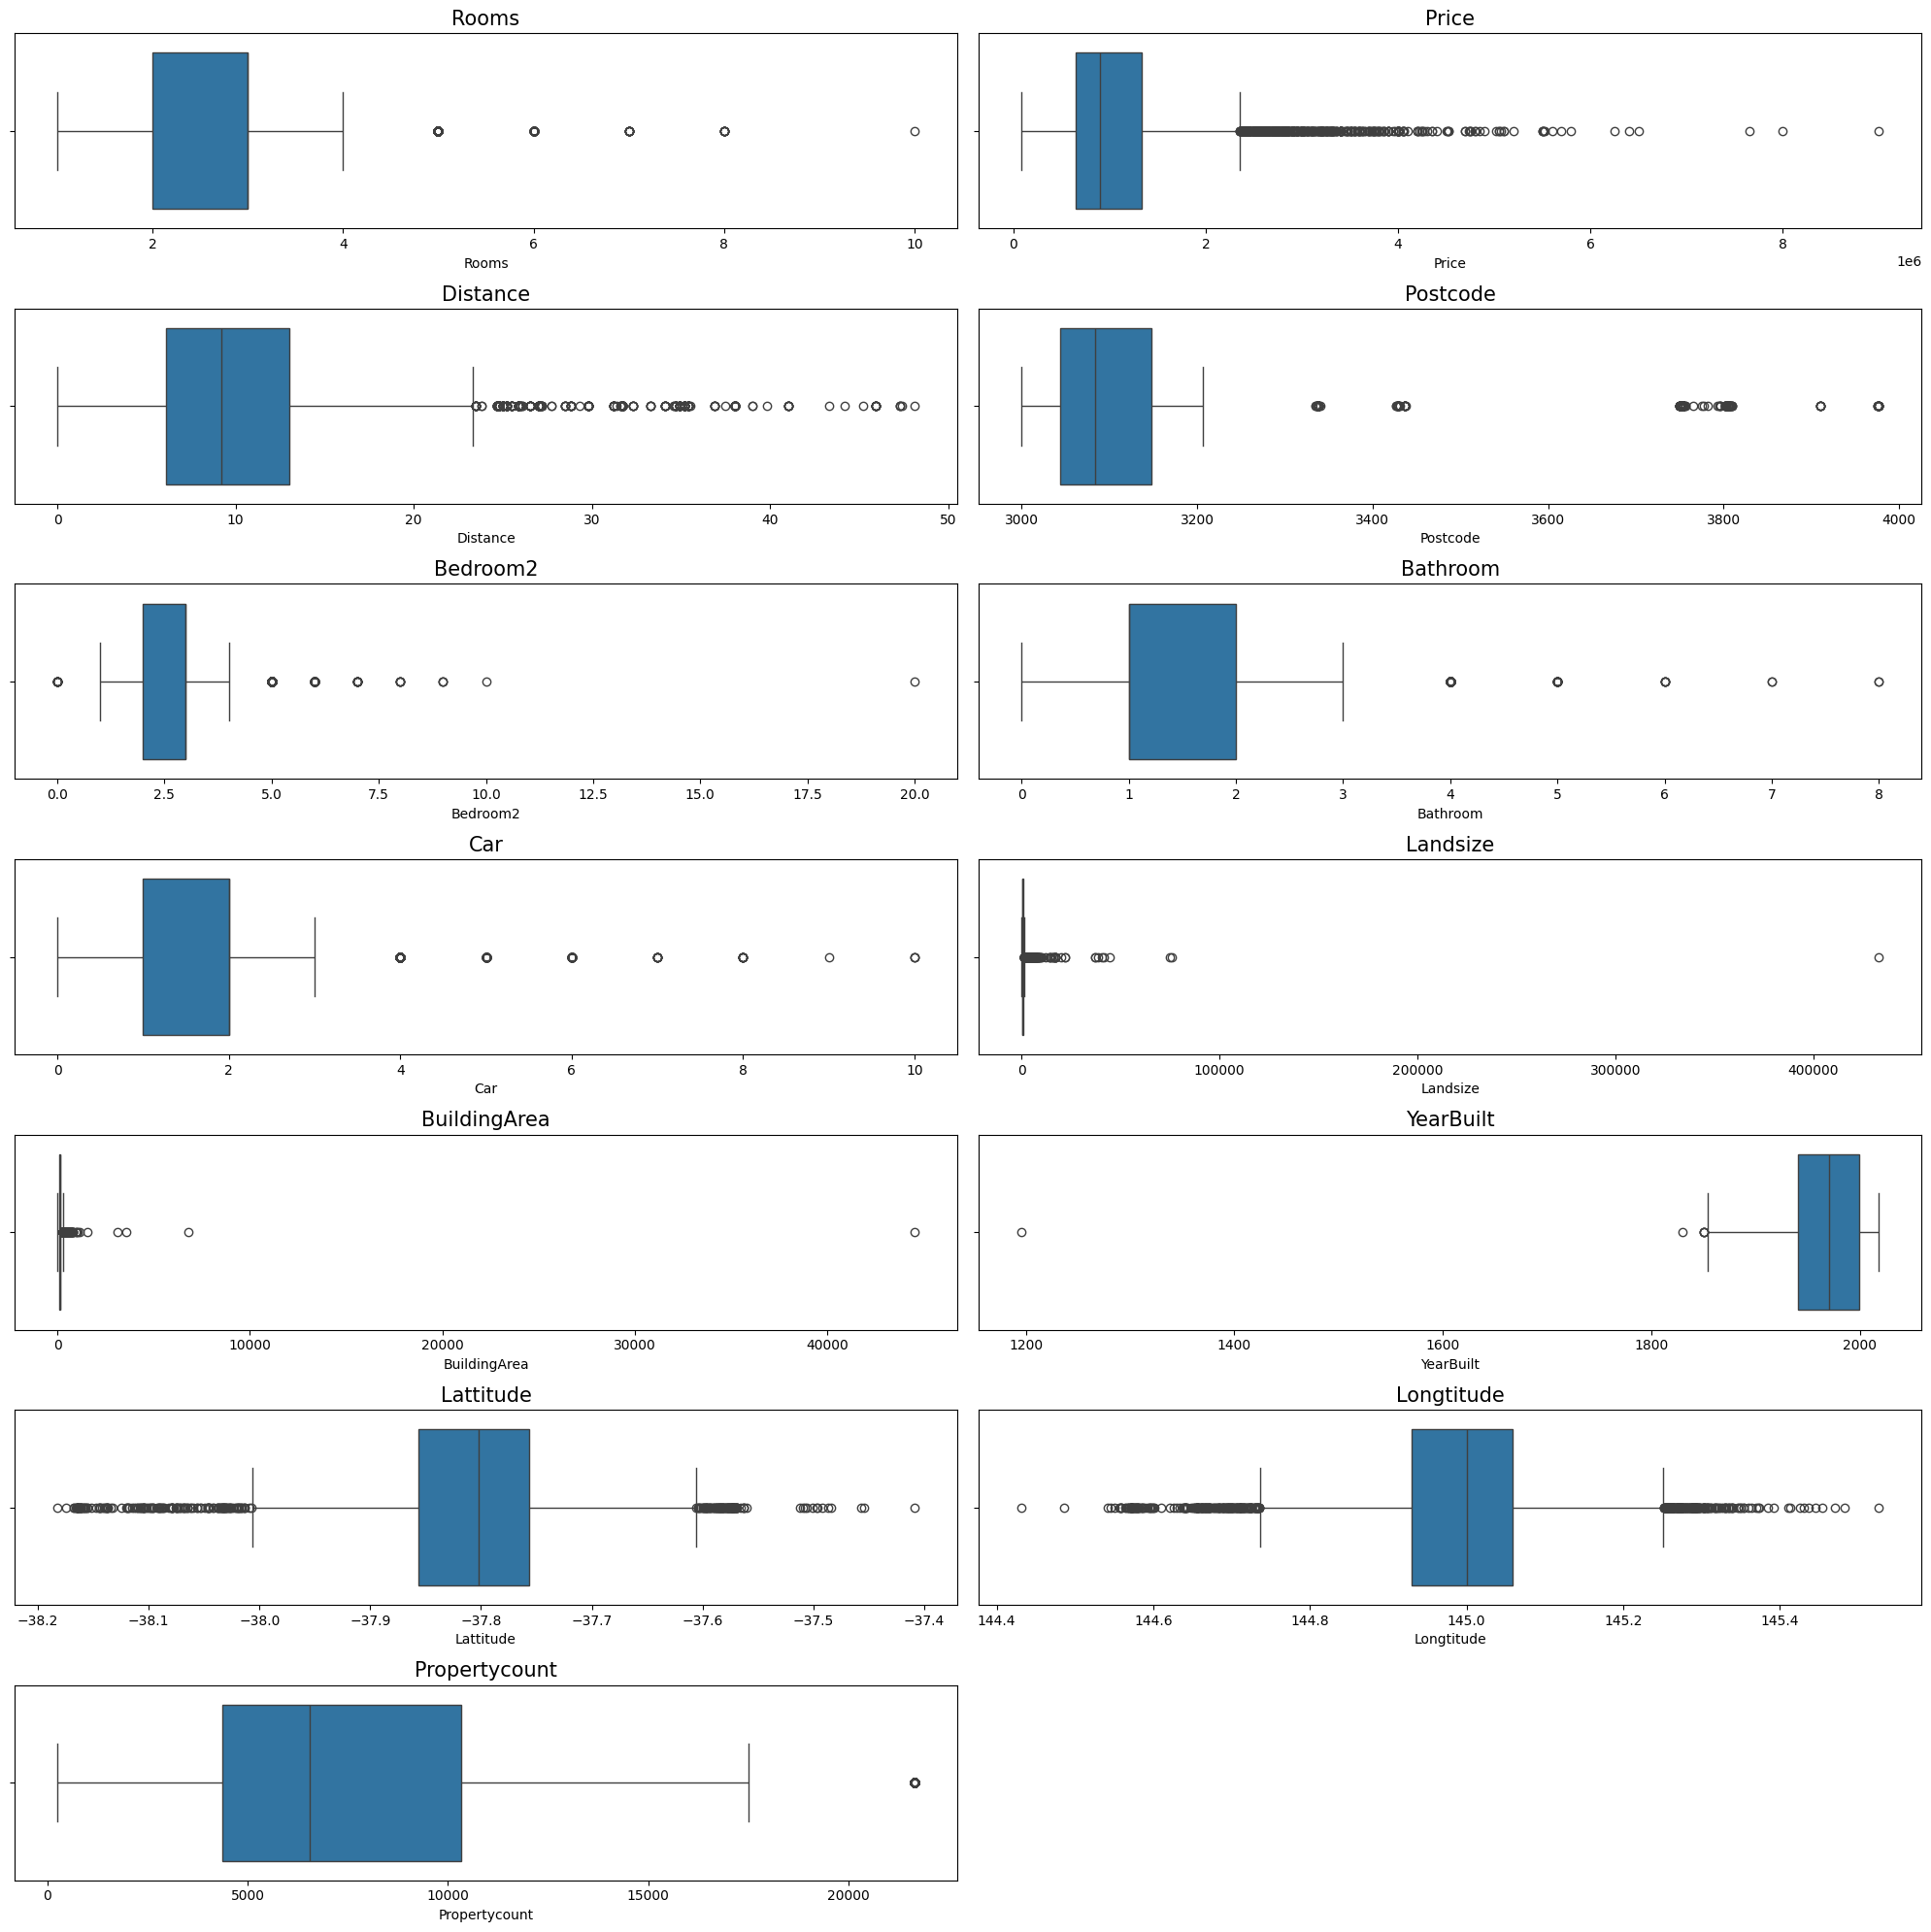

In [12]:

plt.rcParams['figure.figsize'] = (20, 20)
num_features = df.select_dtypes(include='number')

n = num_features.shape[1]

rows = 7
cols = 2

for i in range(n):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(x=num_features.iloc[:, i])
    plt.title(num_features.columns[i], fontsize=15)

# better spacing
plt.tight_layout()
plt.show()

# **Data Cleaning**


- **Check Columns Names**


In [13]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [14]:
df.columns = df.columns.str.lower()
df.columns

Index(['suburb', 'address', 'rooms', 'type', 'price', 'method', 'sellerg',
       'date', 'distance', 'postcode', 'bedroom2', 'bathroom', 'car',
       'landsize', 'buildingarea', 'yearbuilt', 'councilarea', 'lattitude',
       'longtitude', 'regionname', 'propertycount'],
      dtype='object')

- **Handle Missing Values**

  - Check missing value percentage per column.

    - If Missing 5 – 40 % → impute

    - If Missing > 40 % → Drop column.


In [15]:

((df.isna().sum() / df.shape[0]) * 100).round(2)

suburb            0.00
address           0.00
rooms             0.00
type              0.00
price             0.00
method            0.00
sellerg           0.00
date              0.00
distance          0.00
postcode          0.00
bedroom2          0.00
bathroom          0.00
car               0.46
landsize          0.00
buildingarea     47.50
yearbuilt        39.58
councilarea      10.08
lattitude         0.00
longtitude        0.00
regionname        0.00
propertycount     0.00
dtype: float64

- Percentage in 4 Columns :

  - Car : 0.46 % ===> impute

  - CouncilArea : 10.08 %===> impute

  - YearBuilt : 39.58 % ===> impute

  - BuildingArea ===> 47.5 % Drop it


In [16]:
# drop building area column

df = df.drop(columns=['buildingarea'], axis=1)

In [17]:
df.head()

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,bedroom2,bathroom,car,landsize,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


#### **Check Columns In Depth**


- **Numerical**


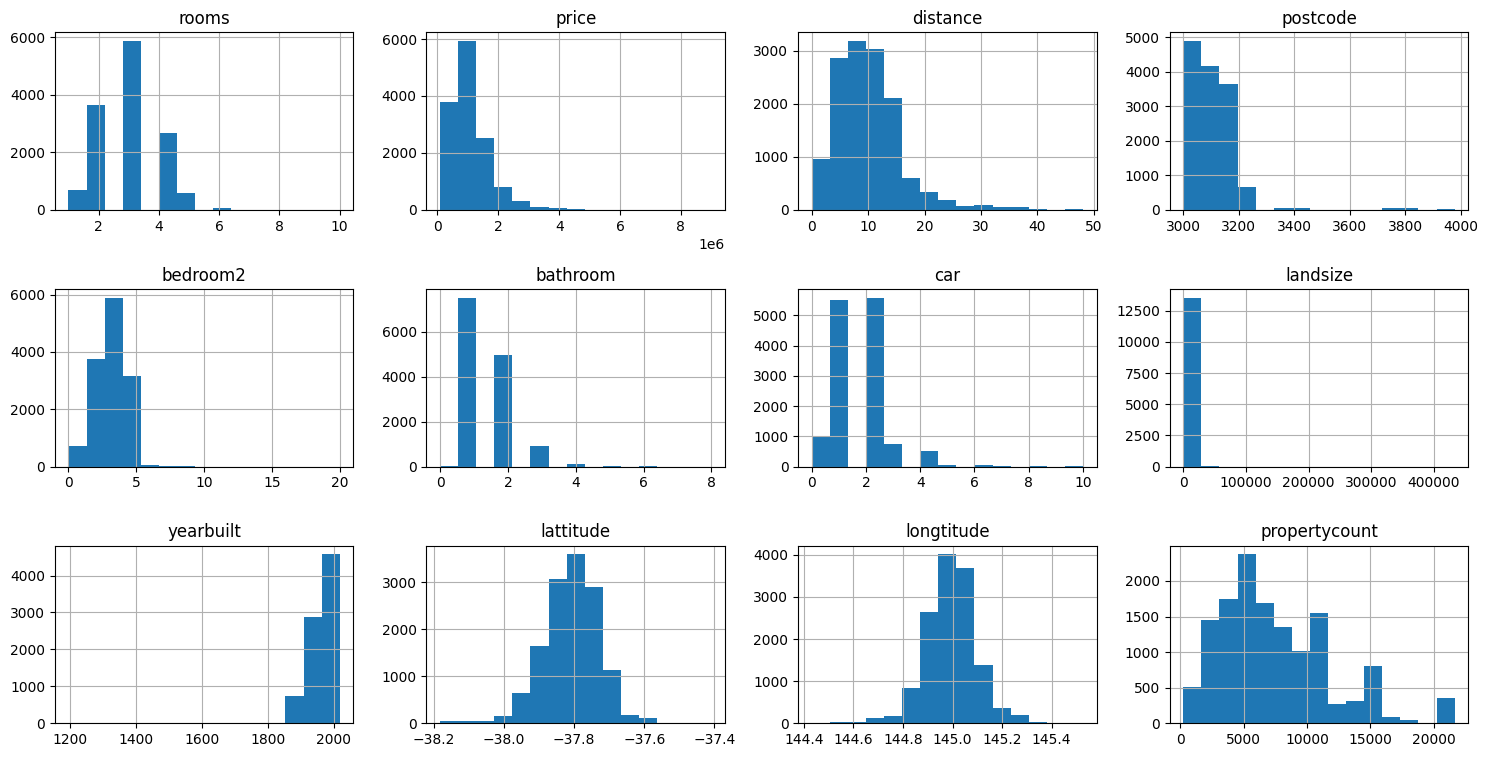

In [18]:
hist_data = df.select_dtypes(include="number")

hist_data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

- **Categorical**


In [19]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['suburb', 'address', 'type', 'method', 'sellerg', 'date', 'councilarea',
       'regionname'],
      dtype='object')

In [20]:
for col in cat_col:
    print(f"{col}")

    print(f"Unique Values : {df[col].nunique()}")
    # print(f"Values : {df[col].unique()}")

    print("__" * 10)

suburb
Unique Values : 314
____________________
address
Unique Values : 13378
____________________
type
Unique Values : 3
____________________
method
Unique Values : 5
____________________
sellerg
Unique Values : 268
____________________
date
Unique Values : 58
____________________
councilarea
Unique Values : 33
____________________
regionname
Unique Values : 8
____________________


- **Drop Unnecessary Columns**


In [21]:
df = df.drop(columns=['postcode', 'lattitude',
             'longtitude', 'propertycount'], axis=1)
df.head()

,suburb,address,rooms,type,price,method,sellerg,date,distance,bedroom2,bathroom,car,landsize,yearbuilt,councilarea,regionname
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,2.0,1.0,1.0,202.0,NaN,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,2.0,1.0,0.0,156.0,1900.0,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3.0,2.0,0.0,134.0,1900.0,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3.0,2.0,1.0,94.0,NaN,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3.0,1.0,2.0,120.0,2014.0,Yarra,Northern Metropolitan


- **Date Column**


In [22]:
df['year'] = df.date.astype('datetime64[ns]').dt.year
df['month'] = df.date.astype('datetime64[ns]').dt.month
df['day'] = df.date.astype('datetime64[ns]').dt.day
df['season'] = df['month'] % 12 // 3 + 1

df.head()

,suburb,address,rooms,type,price,method,sellerg,date,distance,bedroom2,bathroom,car,landsize,yearbuilt,councilarea,regionname,year,month,day,season
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,2.0,1.0,1.0,202.0,NaN,Yarra,Northern Metropolitan,2016,3,12,2
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,2.0,1.0,0.0,156.0,1900.0,Yarra,Northern Metropolitan,2016,4,2,2
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3.0,2.0,0.0,134.0,1900.0,Yarra,Northern Metropolitan,2017,4,3,2
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3.0,2.0,1.0,94.0,NaN,Yarra,Northern Metropolitan,2017,4,3,2
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3.0,1.0,2.0,120.0,2014.0,Yarra,Northern Metropolitan,2016,4,6,2


In [23]:
df.shape

(13580, 20)

In [24]:
df['season'] = df['season'].replace(
    {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

In [25]:
df["season"].value_counts()

season
Summer    5154
Spring    4298
Autumn    2792
Winter    1336
Name: count, dtype: int64

In [26]:
df = df.drop(columns=["date"], axis=1)

In [27]:
df.shape

(13580, 19)

- **Address Column**


In [28]:
split_cols = df['address'].str.split(' ', expand=True)
split_cols

,0,1,2,3
0,85,Turner,St,None
1,25,Bloomburg,St,None
2,5,Charles,St,None
3,40,Federation,La,None
4,55a,Park,St,None
...,...,...,...,...
13575,12,Strada,Cr,None
13576,77,Merrett,Dr,None
13577,83,Power,St,None
13578,96,Verdon,St,None


In [29]:

df['street_name'] = split_cols[1].where(split_cols[1] != 'The', split_cols[2])

In [30]:
df.drop(columns=['address'], axis=1, inplace=True)
df.head()

,suburb,rooms,type,price,method,sellerg,distance,bedroom2,bathroom,car,landsize,yearbuilt,councilarea,regionname,year,month,day,season,street_name
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra,Northern Metropolitan,2016,3,12,Spring,Turner
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,1900.0,Yarra,Northern Metropolitan,2016,4,2,Spring,Bloomburg
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,1900.0,Yarra,Northern Metropolitan,2017,4,3,Spring,Charles
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,NaN,Yarra,Northern Metropolitan,2017,4,3,Spring,Federation
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,2014.0,Yarra,Northern Metropolitan,2016,4,6,Spring,Park


In [ ]:
# df.to_csv('cleaned_data.csv', index=False)

# **Analysis Questions**


1. **What is the distribution of property Price ?**


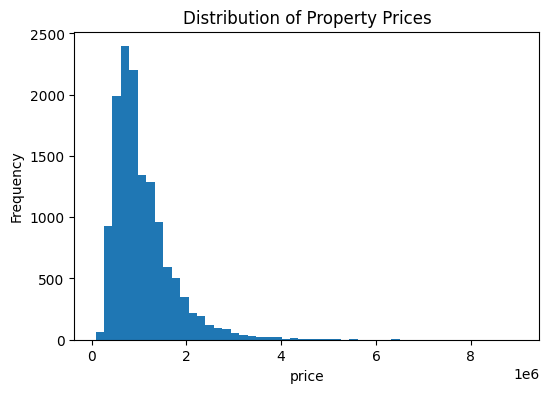

In [32]:
plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=50)
plt.title('Distribution of Property Prices')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

2. **What are the most common Types of properties (h, u, t) ?**


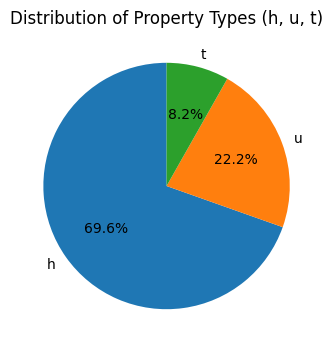

In [33]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(type_counts, labels=type_counts.index,
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Property Types (h, u, t)')
plt.show()

3. **Which Suburb has the highest number of listings ?**


In [34]:
suburb_counts = df['suburb'].value_counts().head(1)
suburb_counts

suburb
Reservoir    359
Name: count, dtype: int64

In [35]:
import plotly.io as pio
pio.renderers.default = "vscode"


In [47]:
px.histogram(df, x='suburb')

3. **What is the distribution of Landsize ?**


In [48]:
px.histogram(df, x='landsize', nbins=50, title='Distribution of Landsize')

4. **How many unique values exist for Suburb ?**


In [38]:
n = df.suburb.nunique()

print(f'The number of unique values for Suburb is : ( { n } ) unique value .')

The number of unique values for Suburb is : ( 314 ) unique value .


5. **Which SellerG agency appears most frequently ?**


In [39]:
seller_counts = df['sellerg'].value_counts().head(10)
fig = px.bar(
    x=seller_counts.index,
    y=seller_counts.values,
    title='Top 10 Most Frequent SellerG Agencies',
    labels={'x': 'SellerG', 'y': 'Count'},
    width=700,
    height=400
)
fig.show()

6. **What is the distribution of the number of Rooms ?**


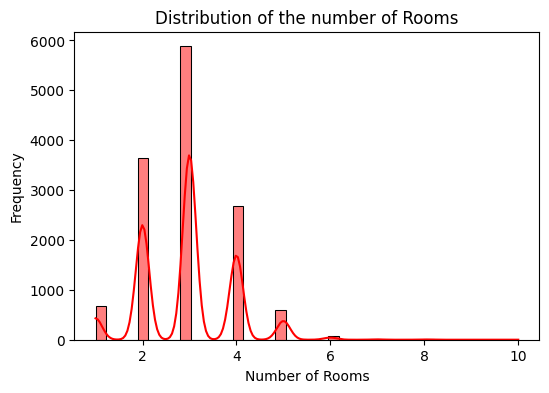

In [40]:
plt.figure(figsize=(6, 4))
sns.histplot(df['rooms'], bins=40, kde=True, color='red')
plt.title('Distribution of the number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.show()

7. **How many properties were sold across different CouncilAreas ?**


In [41]:
c = df.councilarea.value_counts()

px.bar(c, x=c.index, y=c.values, title='Number of Properties Sold across Different CouncilAreas',
       labels={'x': 'CouncilArea', 'y': 'Number of Properties Sold'})

8. **Which Method of sale is most common ?**


In [42]:
d = df.method.value_counts().sort_values(ascending=False).index[0]

print(f'The most common Method of sale is : ( {d} ) .')

The most common Method of sale is : ( S ) .


9. **How does Price vary with Rooms ?**


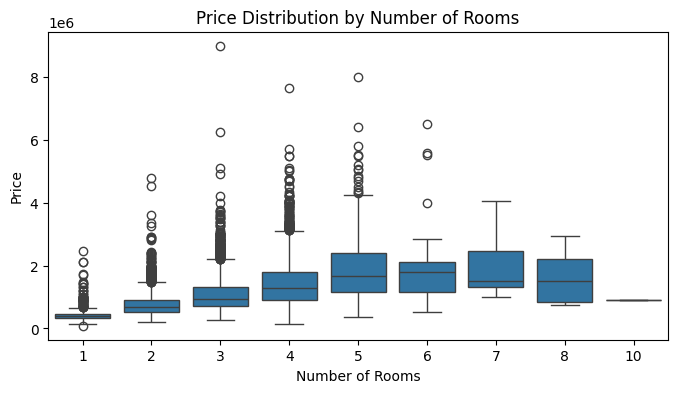

In [43]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="rooms", y="price", data=df)
plt.title("Price Distribution by Number of Rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Price")
plt.show()

10. **How does Price vary with landsize ?**


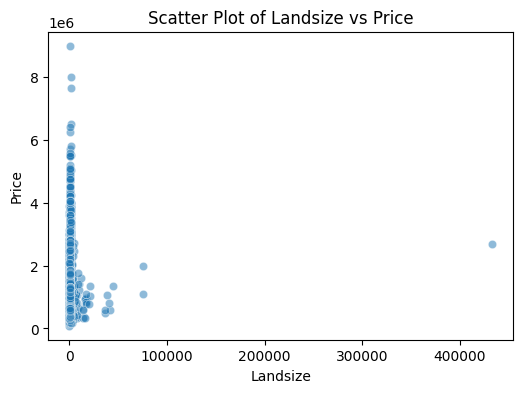

In [44]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='landsize', y='price', data=df, alpha=0.5)
plt.title('Scatter Plot of Landsize vs Price')
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.show()

11. **How does `Distance` from CBD impact `Price`?**


In [45]:
corr = df["distance"].corr(df["price"])
print(f"> Correlation between Distance and Price: {corr:.3f}")
print("> There is a very weak negative correlation between Distance from CBD and Price. \n> As the distance from CBD increases, the price tends to decrease slightly.")

> Correlation between Distance and Price: -0.163
> There is a very weak negative correlation between Distance from CBD and Price. 
> As the distance from CBD increases, the price tends to decrease slightly.


12. **Is there a relationship between `Car` (parking spots) and `Price` ?**


In [46]:
car_price_corr = df['car'].corr(df['price']).round(3)
print(
    f"Correlation between Car (number of parking spots) and Price: {car_price_corr} .")
print(">> There is a weak positive correlation between the number of parking spots and property price .\n>> suggesting that more parking can slightly increase value .")

Correlation between Car (number of parking spots) and Price: 0.239 .
>> There is a weak positive correlation between the number of parking spots and property price .
>> suggesting that more parking can slightly increase value .
